C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\CYTech St

Prédiction pour 0:00: 
 1079    0.883938
dtype: float64
Prédiction pour 0:30: 
 1079    1.106648
dtype: float64
Prédiction pour 23:30: 
 1079    0.924235
dtype: float64
Prédiction pour le prochain jour en prenant les consos quotidiennes: 
 1079    49.23312
dtype: float64
Prédiction pour le prochain jour en prenant la somme des consos sur chaque 30min: 
 1079    50.123825
dtype: float64


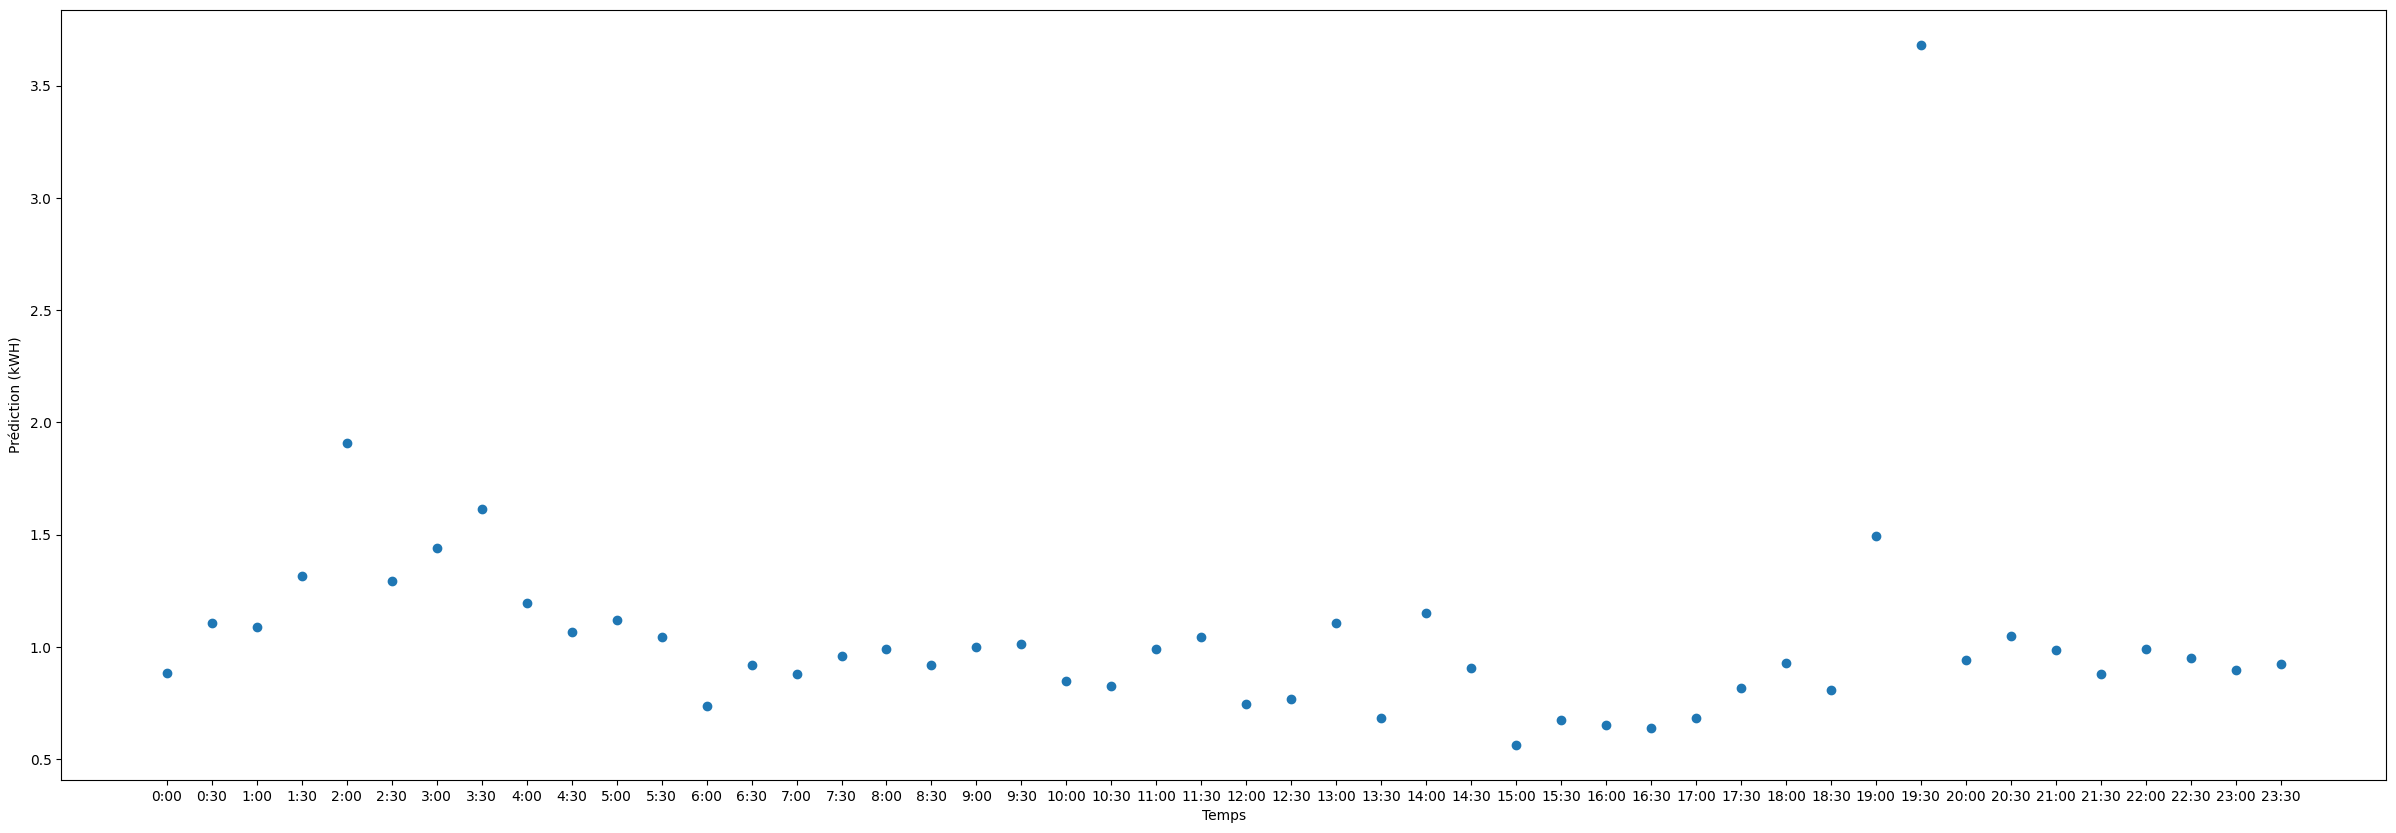

In [91]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Charger les données en utilisant pandas
data = pd.read_csv("data_maison_M110-4-659.csv", parse_dates=["date"])

# Convertir la colonne "date" en format de date
data["date"] = pd.to_datetime(data["date"])

# Définir la colonne "conso" comme étant la variable cible
data = data.set_index("date")

# Entraîner le modèle ARIMA
models = {}
for col in data.columns:
    models[col] = ARIMA(data[col], order=(2,1,2)).fit()

forecast = []
# Afficher les prévisions pour chaque modèle
for col in models:
    forecast.append(models[col].forecast(steps=1))

print("Prédiction pour 0:00: \n", forecast[1])
print("Prédiction pour 0:30: \n", forecast[2])
print("Prédiction pour 23:30: \n", forecast[48])
print("Prédiction pour le prochain jour en prenant les consos quotidiennes: \n", forecast[0])
print("Prédiction pour le prochain jour en prenant la somme des consos sur chaque 30min: \n", sum(forecast) - forecast[0])

import matplotlib.pyplot as plt

# Définir les données pour les ordonnées et les abscisses
y = list(forecast)[1:]
x = list(data.columns)[1:]

plt.figure(figsize=(30,10))
# Créer le graphique à scatter
plt.scatter(x, y)

# Ajouter des étiquettes pour les axes
plt.ylabel('Prédiction (kWH)')
plt.xlabel('Temps')
# Afficher le graphique
plt.show()